In [103]:
import tensorflow as tf;
import pandas as pd;
import matplotlib.image as mpimg;
import matplotlib.pyplot as plt;
import os;
import random;
import pathlib;
import numpy as np;

In [104]:
for dirpath,dirname,filename in os.walk("cloth_dataset"):
    print(f"There are {len(dirname)} directories and {len(filename)} images in { dirpath}")

There are 2 directories and 0 images in cloth_dataset
There are 0 directories and 199 images in cloth_dataset\jeans
There are 0 directories and 199 images in cloth_dataset\tshirt


In [105]:
data_dir=pathlib.Path("cloth_dataset")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)
    

['jeans' 'tshirt']


the shape of the image is(655, 513, 3)


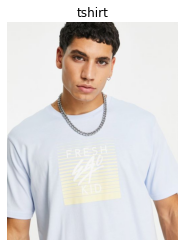

In [106]:
def view_random_image(target_dir,target_class):
    target_folder=target_dir+target_class
    random_image=random.sample(os.listdir(target_folder),1)
    img=mpimg.imread(target_folder+ "/" + random_image[0])
    plt.imshow(img)
    plt.axis("off")
    plt.title(target_class)
    print(f"the shape of the image is {img.shape}")
    return img
img=view_random_image(target_dir="cloth_dataset/",target_class="tshirt")

In [107]:
from keras.preprocessing.image import ImageDataGenerator;
tf.random.set_seed(42)
datagen=ImageDataGenerator(rescale=1./255,rotation_range=0.2,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True,zoom_range=0.2,shear_range=0.2)
train_data_dir="cloth_dataset/"
data=datagen.flow_from_directory(directory=train_data_dir,target_size=(224,224),class_mode="binary",batch_size=32,shuffle=True,seed=42)

Found 398 images belonging to 2 classes.


In [108]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="same"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),  
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch :1e-4*10**(epoch/20))
history=model.fit(data,epochs=10,steps_per_epoch=len(data),verbose=1)

Epoch 1/10
13/13 [==============================] - 4s 300ms/step - loss: 0.7185 - accuracy: 0.5276
Epoch 2/10
13/13 [==============================] - 4s 302ms/step - loss: 0.6052 - accuracy: 0.6834
Epoch 3/10
13/13 [==============================] - 4s 291ms/step - loss: 0.5085 - accuracy: 0.7412
Epoch 4/10
13/13 [==============================] - 4s 286ms/step - loss: 0.4403 - accuracy: 0.8191
Epoch 5/10
13/13 [==============================] - 4s 292ms/step - loss: 0.3828 - accuracy: 0.8518
Epoch 6/10
13/13 [==============================] - 4s 294ms/step - loss: 0.3300 - accuracy: 0.8643
Epoch 7/10
13/13 [==============================] - 4s 283ms/step - loss: 0.3071 - accuracy: 0.8693
Epoch 8/10
13/13 [==============================] - 4s 279ms/step - loss: 0.2986 - accuracy: 0.8643
Epoch 9/10
13/13 [==============================] - 4s 296ms/step - loss: 0.2705 - accuracy: 0.8920
Epoch 10/10
13/13 [==============================] - 4s 291ms/step - loss: 0.2443 - accuracy: 0.9095

Text(0, 0.5, 'loss')

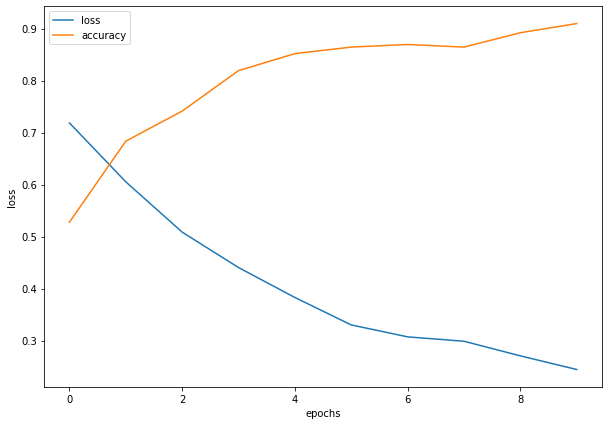

In [109]:
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.xlabel("epochs")
plt.ylabel("loss")

In [110]:
def load_and_pred_image(filename,img_shape=224):
    img=tf.io.read_file(filename)
    img=tf.image.decode_image(img)
    img=tf.image.resize(img,size=[img_shape,img_shape])
    img=img/255.
    return img
def pred_and_plot_image(model,filename,class_names=class_names):
    img=load_and_pred_image(filename)
    pred=model.predict(tf.expand_dims(img,axis=0))
    pred_class=class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction:{pred_class}")
    print(pred)
    

1/1 [==============================] - 0s 52ms/step
[[0.37659582]]


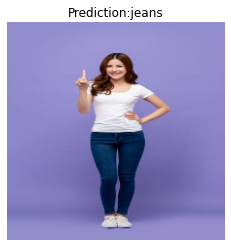

In [111]:
pred_and_plot_image(model,"jeans_image.jpg") #when image contains both jeans and tshirt it is observed that the predicted probability is close to 50%
#since its less than 50% it has opted jeans has the predicted class

1/1 [==============================] - 0s 16ms/step
[[0.30470085]]


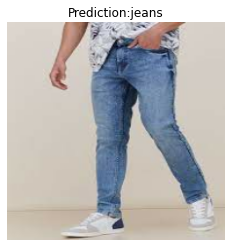

In [112]:
pred_and_plot_image(model,"jeans.jpg")#since this image contains only jeans the predicted value is less than 50 % thus it chose jeans as the predicted class

1/1 [==============================] - 0s 17ms/step
[[0.63187444]]


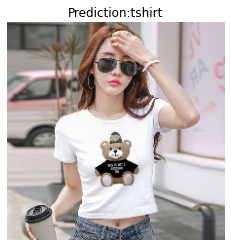

In [113]:
pred_and_plot_image(model,"tshirt4.jpg")#since this image contains mostly tshirt its probably is over 95% and chose tshirt has the predicted class